In [1]:

#Import libraries

import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir(r"C:\Users\swara\OneDrive\Desktop\Resume Classification\Resume")

['PeopleSoft', 'React JS Developer', 'SQL Developer', 'Workday']

In [3]:
## Exctract the Text from Dataset

In [4]:
file_path1 = []
category1  = []
directory1 = (r"C:\Users\swara\OneDrive\Desktop\Resume Classification\Resume\PeopleSoft")
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [5]:

data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [6]:

file_path2 = []
category2  = []
directory2 = (r"C:\Users\swara\OneDrive\Desktop\Resume Classification\Resume\React JS Developer")
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [7]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer


In [8]:

file_path3 = []
category3  = []
directory3 = (r"C:\Users\swara\OneDrive\Desktop\Resume Classification\Resume\SQL Developer")
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [9]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer


In [10]:
file_path4 = []
category4  = []
directory4 = (r"C:\Users\swara\OneDrive\Desktop\Resume Classification\Resume\Workday")
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [11]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,G Himaja\n\n ...,Workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
6,Workday HCM Techno functional Consultant ...,Workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
8,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday


In [12]:
## Create a DataFrame

In [13]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN


In [14]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [15]:
## Merge all Unnecessary column in One Column

In [16]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [17]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [18]:
## Final Dataset

In [19]:
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [20]:
## Saving to CSV files

In [22]:
resume_data.to_csv('Resume.csv', index= False)

## Remove the stop Words

In [23]:
# Define stopwords outside the function
stop = set(stopwords.words('english'))

# Function to remove stopwords and numerical values from text
def remove_stopwords_and_numbers(text, stop):
    words = text.split()
    # Remove numerical values
    words = [word for word in words if not word.isdigit()]
    
    # Remove stopwords
    
    filtered_words = [word for word in words if word.lower() not in stop]
    return ' '.join(filtered_words)

# Assuming you have resume data in a pandas DataFrame named `resume_data`
resume_data['Cleaned_Details'] = resume_data['Raw_Details'].apply(remove_stopwords_and_numbers, args=(stop,))

# Displaying the 'Raw_Details' and 'Cleaned_Details' columns for the first few rows
print(resume_data[['Raw_Details', 'Cleaned_Details']].head())

                                         Raw_Details  \
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...   
1  Classification: Internal\n\nClassification: In...   
2  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...   
3  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...   
4  PeopleSoft Administration\n\n \n\nVivekanand S...   

                                     Cleaned_Details  
0  Anubhav Kumar Singh Core Competencies: Scripti...  
1  Classification: Internal Classification: Inter...  
2  SIRAZUDDIN Bangalore, INDIA SIRAZUDDIN Bangalo...  
3  PeopleSoft Admin VARKALA VIKAS Career Objectiv...  
4  PeopleSoft Administration Vivekanand Sayana Ca...  


In [24]:
resume_data

,Category,Raw_Details,Cleaned_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Anubhav Kumar Singh Core Competencies: Scripti...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,Classification: Internal Classification: Inter...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...","SIRAZUDDIN Bangalore, INDIA SIRAZUDDIN Bangalo..."
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Admin VARKALA VIKAS Career Objectiv...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft Administration Vivekanand Sayana Ca...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,Hari Narayana PROFESSIONAL SUMMARY 4.6 years e...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Murali PROFESSIONAL SUMMARY 4.6 years experien...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Tanna Sujatha OBJECTIVE Seeking challenging ro...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,"C N C : Address: Manyata Tech Park, Nagavara, ..."


## Text Pre-Processing

In [ ]:
#Using regular Expression

In [25]:
def preprocess(sentence):
    sentence = str(sentence)# convert sentence into string
    sentence = sentence.lower()# convert entired string into lower case
    sentence = sentence.replace('{html}',"")# removing substring from text this use when text contain tags indicating html content
    cleanr = re.compile('<.*?>')#create a compiled expression pattern to remove all html tags
    cleantext = re.sub(cleanr,'',sentence)# use regular expression pattern to remove the htmltag
    rem_url = re.sub(r'http\s+','',cleantext)# remove any url starting from http
    rem_num = re.sub('[0-9]+','',rem_url)# remove any sequence of digit from text if present
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 
                      if not w in stopwords.words('english') ]
    return " ".join(filtered_words)

In [27]:
resume_data = pd.read_csv('Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [ ]:
# Clean text from Resume

In [28]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


In [ ]:
# Save the Clean Data in new CSV File

In [29]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [30]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [31]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [32]:
resume_data.Resume_Details[3]

'peoplesoft admin varkala vikas career objective total years experience peoplesoft admin peoplesoft dba hope enhance skill set adding value business enable implementation solutions aid company objectives understanding anticipating needs interests motivations clients deliver time budget quality delivering value improving agility quality reliability professional summary years experience peoplesoft implementation support people tools upgrades configuration migrations maintenance administration application server domains process scheduler servers web server domains pum elastic search involved various tools application upgrades experience driving infrastructure hardware upgrades disaster recovery activities configured https secure web server ssl administration monitor system developing maintaining monitoring shell scripts experience oracle database administration experience health check peoplesoft environments experience peoplesoft database refreshes production development testing environme

##EDA

In [ ]:
#No of profiles in reesume with their Count

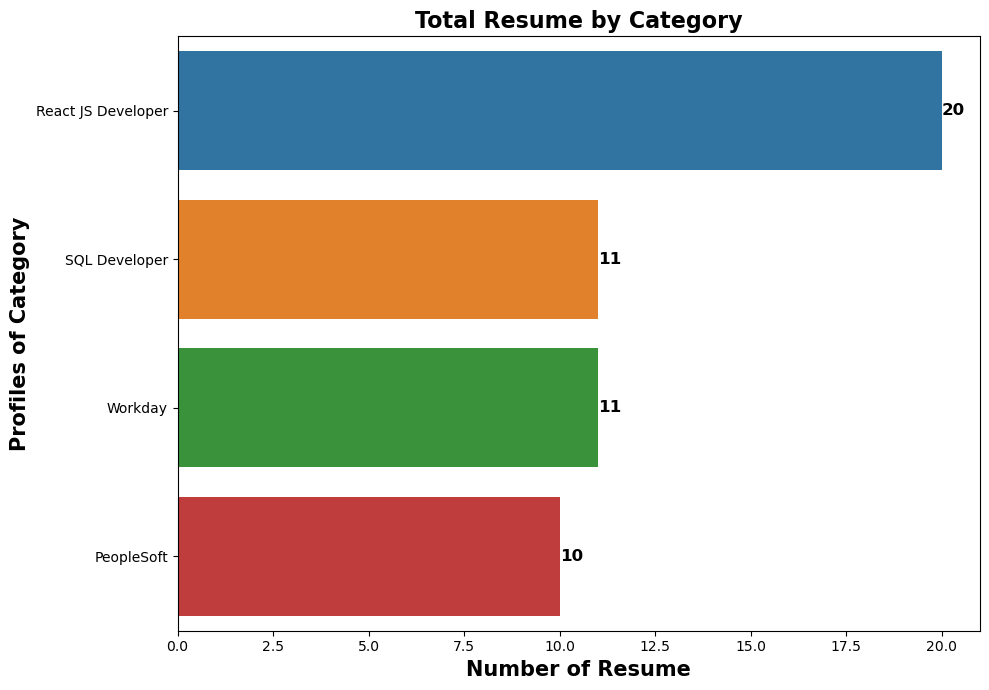

In [33]:
plt.figure(figsize=(10,7))
ax = sns.countplot(y ='Category' , data = resume_data , order=resume_data['Category'].value_counts().index)


plt.xlabel('Number of Resume', size = 15, fontweight = 'bold')
plt.ylabel('Profiles of Category', size = 15, fontweight = 'bold')
plt.title('Total Resume by Category',size = 16,fontweight ='bold')

# Data labels
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold',fontsize = 12)

plt.tight_layout()
plt.show()

In [ ]:
#Percentage of Profiles

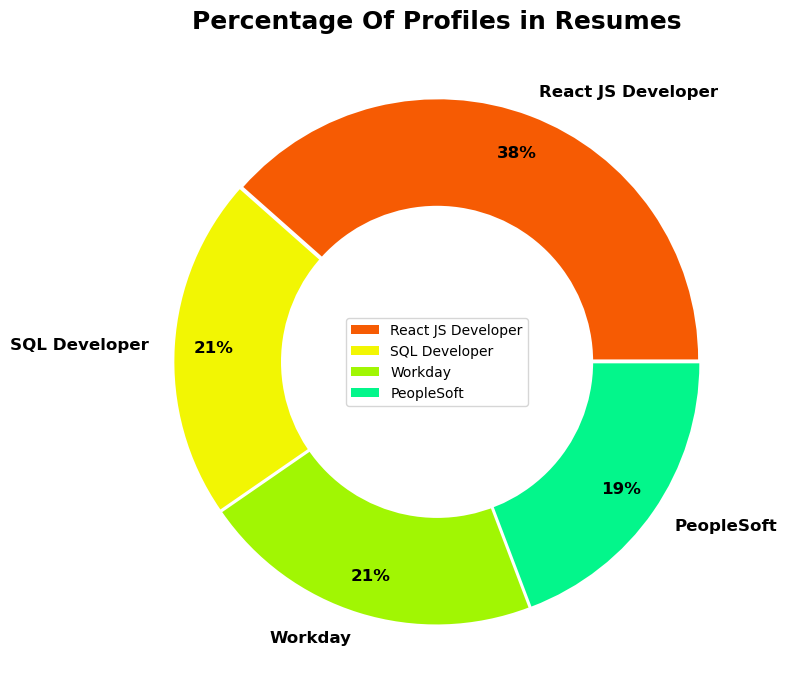

In [34]:
fig = plt.figure(figsize=(8,8),dpi = 100)

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B','#4dc0b5']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes,colors=colors,labels=labels,autopct='%1.0f%%',pctdistance=0.85,explode=explode,
        startangle=0,textprops={'size':'large', 'fontweight':'bold', 'rotation':'horizontal', 'color':'black'})

# Create a white circle at the center of the pie chart to make it look like donut
centre_circle = plt.Circle((0,0),0.60,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Percentage Of Profiles in Resumes',fontsize= 18, fontweight= 'bold')
plt.legend(labels,loc = "center")

fig.tight_layout()
plt.show()

In [35]:
from collections import Counter

In [36]:
!pip install pyresparser

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pyresparser (from versions: none)
ERROR: No matching distribution found for pyresparser


In [37]:
# Load your resume dataset
resume_df = pd.read_csv('Cleaned_Resumes.csv') # Replace 'resume_dataset.csv' with your actual dataset file path


# Assuming your dataset has a column named 'Resume_Details' containing the resume text
# You may need to adjust this column name accordingly

# Define a function to extract skills from resume details
def extract_skills(resume_text):
    # Define a list of common skills or keywords
    skills_list = ['Tuxedo', 'App designer', 'PUM', 'UNIX', 'Windows', 'Oracle DBA', 'RHEL AS4', 'OEL 5.5', 'OEL 6', 'Linux','Autosys', 'Teamwork', 'Problem Solving',
                'WebTechnology','PHP','SQL','JAVA','Full Stack','C','C++','HTML','Data  Structures','Networking','Bootstrap','React JS','MYSQL','power bi','T-SQL'
                'Workday Web Services','Basic shell scripting','Workday Studio','Workday HCM','MVEL Web Services SOAP ','XML']
            
    # Initialize an empty list to store extracted skills
    extracted_skills = []
    
    # Iterate through the list of common skills and check if they appear in the resume text
    for skill in skills_list:
        # Use case-insensitive regular expression to find skill occurrences
        if re.search(r'\b{}\b'.format(skill), resume_text, re.IGNORECASE):
            extracted_skills.append(skill)
    
    return extracted_skills

# Apply the function to extract skills from each resume in the dataset
resume_df['Extracted_Skills'] = resume_df['Resume_Details'].apply(extract_skills)

# Save the updated dataset with extracted skills
resume_df.to_csv('resume_dataset_with_skills.csv', index=False)  # Replace 'resume_dataset_with_skills.csv' with your desired output file path


In [38]:
pd.read_csv('resume_dataset_with_skills.csv')

,Category,Resume_Details,Extracted_Skills
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,"['Tuxedo', 'App designer', 'PUM', 'UNIX', 'Win..."
1,PeopleSoft,classification internal classification interna...,"['PUM', 'UNIX', 'Windows', 'Linux', 'Autosys',..."
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,"['Tuxedo', 'PUM', 'UNIX', 'Windows', 'Problem ..."
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,"['Tuxedo', 'PUM', 'Windows', 'Linux']"
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...,"['Tuxedo', 'PUM', 'Windows', 'Linux']"
5,PeopleSoft,hari narayana professional summary years exper...,"['UNIX', 'Windows', 'SQL']"
6,PeopleSoft,murali professional summary years experience p...,"['UNIX', 'Windows', 'SQL']"
7,PeopleSoft,priyabrata hota career objective pursuing peop...,['SQL']
8,PeopleSoft,tanna sujatha objective seeking challenging ro...,['SQL']
9,PeopleSoft,address manyata tech park nagavara bangalore l...,"['SQL', 'JAVA', 'Full Stack']"


In [ ]:
#Overall Skill in All Category

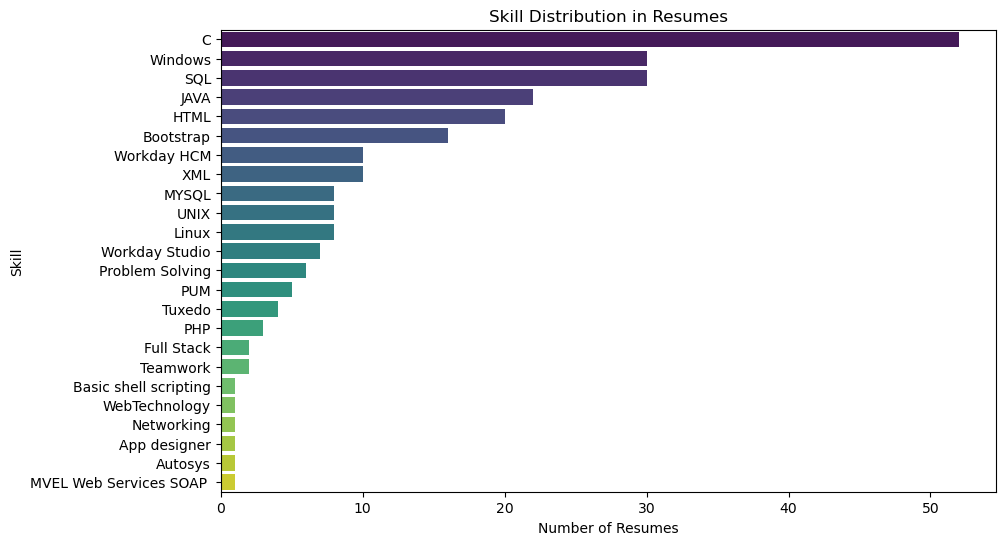

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset
resume_df = pd.read_csv('Cleaned_Resumes.csv')  # Replace 'resume_dataset.csv' with your actual dataset file path

# Assuming your dataset has a column named 'Resume_Details' containing the resume text
# You may need to adjust this column name accordingly

# Define a function to extract skills from resume details
def extract_skills(resume_text):
    # Perform skill extraction logic here
    # For demonstration, let's assume we have a predefined list of skills
    predefined_skills = ['Tuxedo', 'App designer', 'PUM', 'UNIX', 'Windows', 'Oracle DBA', 'RHEL AS4', 'OEL 5.5', 'OEL 6', 'Linux','Autosys', 'Teamwork', 'Problem Solving',
                'WebTechnology','PHP','SQL','JAVA','Full Stack','C','C++','HTML','Data  Structures','Networking','Bootstrap','React JS','MYSQL','power bi','T-SQL'
                'Workday Web Services','Basic shell scripting','Workday Studio','Workday HCM','MVEL Web Services SOAP ','XML']
    extracted_skills = []
    for skill in predefined_skills:
        if skill.lower() in resume_text.lower():
            extracted_skills.append(skill)
    return extracted_skills

# Apply the function to extract skills from each resume in the dataset
resume_df['Extracted_Skills'] = resume_df['Resume_Details'].apply(extract_skills)

# Count the occurrences of each skill
all_skills = [skill for skills in resume_df['Extracted_Skills'] for skill in skills]
skill_counts = Counter(all_skills)

# Convert skill counts to a DataFrame for plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

# Sort the DataFrame by skill count in descending order
skill_df = skill_df.sort_values(by='Count', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Skill Distribution in Resumes')
plt.xlabel('Number of Resumes')
plt.ylabel('Skill')
plt.show()


In [ ]:
#Skill Requried in Peoplesoft Resume

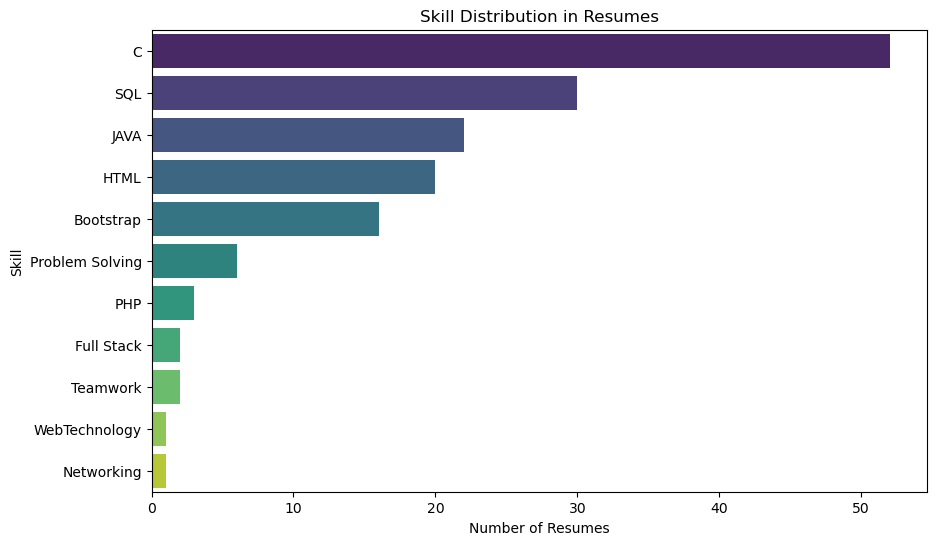

In [40]:
# Load resume dataset
resume_df = pd.read_csv('Cleaned_Resumes.csv')  # Replace 'resume_dataset.csv' with your actual dataset file path

# Assuming your dataset has columns 'Resume_Details' and 'Category'
# You may need to adjust these column names based on your dataset structure

# Filter resumes for the "PeopleSoft" category
peoplesoft_resumes = resume_df[resume_df['Category'] == 'PeopleSoft Resume']

def extract_skills(resume_text):
    # Perform skill extraction logic here
    # For demonstration, let's assume we have a predefined list of skills
    predefined_skills = ['WebTechnology','PHP','SQL','JAVA','Full Stack','C','C++','HTML','Data  Structures','Networking','Bootstrap','React JS', 'Teamwork', 'Problem Solving']
    extracted_skills = []
    for skill in predefined_skills:
        if skill.lower() in resume_text.lower():
            extracted_skills.append(skill)
    return extracted_skills

# Apply the function to extract skills from each resume in the dataset
resume_df['Extracted_Skills'] = resume_df['Resume_Details'].apply(extract_skills)

# Count the occurrences of each skill
all_skills = [skill for skills in resume_df['Extracted_Skills'] for skill in skills]
skill_counts = Counter(all_skills)

# Convert skill counts to a DataFrame for plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

# Sort the DataFrame by skill count in descending order
skill_df = skill_df.sort_values(by='Count', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Skill Distribution in Resumes')
plt.xlabel('Number of Resumes')
plt.ylabel('Skill')
plt.show()

In [ ]:
#Skill Requied React Developer

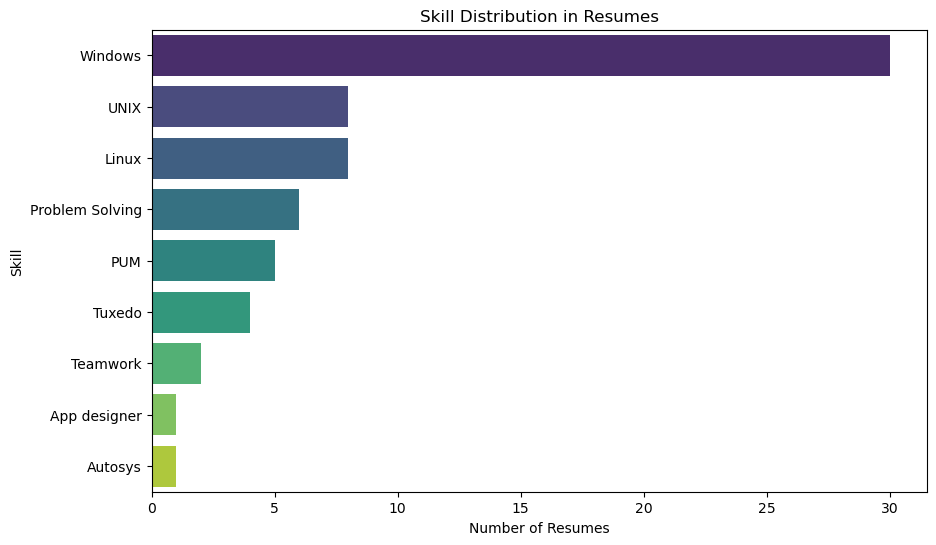

In [41]:
# Load resume dataset
resume_df = pd.read_csv('Cleaned_Resumes.csv')  # Replace 'resume_dataset.csv' with your actual dataset file path

# Assuming your dataset has columns 'Resume_Details' and 'Category'
# You may need to adjust these column names based on your dataset structure

# Filter resumes for the "PeopleSoft" category
peoplesoft_resumes = resume_df[resume_df['Category'] == 'React Developer']

def extract_skills(resume_text):
    # Perform skill extraction logic here
    # For demonstration, let's assume we have a predefined list of skills
    predefined_skills = ['Tuxedo', 'App designer', 'PUM', 'UNIX', 'Windows', 'Oracle DBA', 'RHEL AS4', 'OEL 5.5', 'OEL 6', 'Linux','Autosys', 'Teamwork', 'Problem Solving']
    extracted_skills = []
    for skill in predefined_skills:
        if skill.lower() in resume_text.lower():
            extracted_skills.append(skill)
    return extracted_skills

# Apply the function to extract skills from each resume in the dataset
resume_df['Extracted_Skills'] = resume_df['Resume_Details'].apply(extract_skills)

# Count the occurrences of each skill
all_skills = [skill for skills in resume_df['Extracted_Skills'] for skill in skills]
skill_counts = Counter(all_skills)

# Convert skill counts to a DataFrame for plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

# Sort the DataFrame by skill count in descending order
skill_df = skill_df.sort_values(by='Count', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Skill Distribution in Resumes')
plt.xlabel('Number of Resumes')
plt.ylabel('Skill')
plt.show()

In [ ]:
#Skill Required SQL Developer

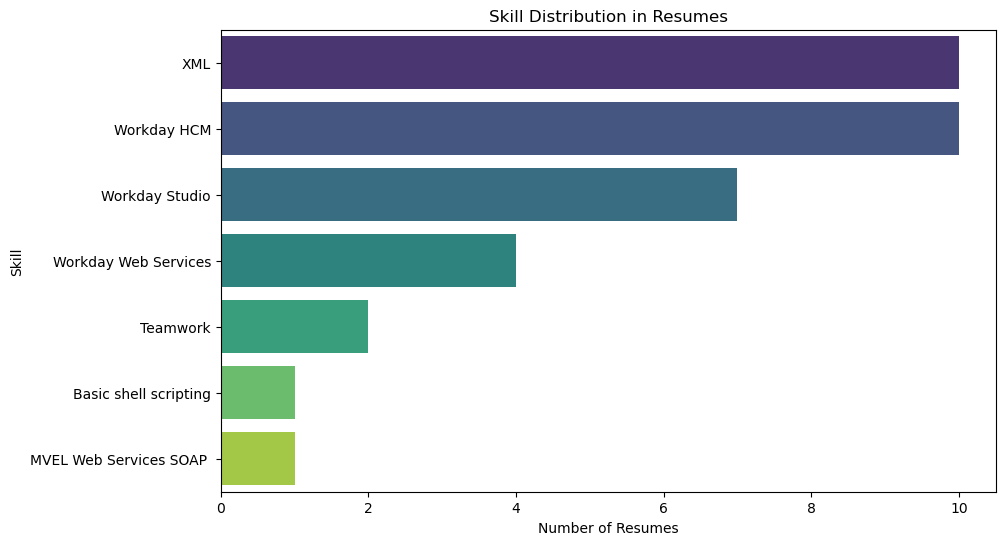

In [42]:
# Load resume dataset
resume_df = pd.read_csv('Cleaned_Resumes.csv')  # Replace 'resume_dataset.csv' with your actual dataset file path

# Assuming your dataset has columns 'Resume_Details' and 'Category'
# You may need to adjust these column names based on your dataset structure

# Filter resumes for the "PeopleSoft" category
peoplesoft_resumes = resume_df[resume_df['Category'] == 'workday']

def extract_skills(resume_text):
    # Perform skill extraction logic here
    # For demonstration, let's assume we have a predefined list of skills
    predefined_skills = ['Workday Web Services','Basic shell scripting','Workday Studio','Workday HCM','MVEL Web Services SOAP ','XML', 'Teamwork']
    extracted_skills = []
    for skill in predefined_skills:
        if skill.lower() in resume_text.lower():
            extracted_skills.append(skill)
    return extracted_skills

# Apply the function to extract skills from each resume in the dataset
resume_df['Extracted_Skills'] = resume_df['Resume_Details'].apply(extract_skills)

# Count the occurrences of each skill
all_skills = [skill for skills in resume_df['Extracted_Skills'] for skill in skills]
skill_counts = Counter(all_skills)

# Convert skill counts to a DataFrame for plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

# Sort the DataFrame by skill count in descending order
skill_df = skill_df.sort_values(by='Count', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Skill Distribution in Resumes')
plt.xlabel('Number of Resumes')
plt.ylabel('Skill')
plt.show()

In [43]:
# Function to extract years of experience from text
def extract_years_of_experience(text):
    # Regular expression to find numerical values followed by certain keywords
    pattern = r'(\d+(\.\d+)?)\s*(year|yr|years|yrs)\s*(of\s*)?(experience|exp)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    
    # Extract numerical values and convert to float
    years = [float(match[0]) for match in matches]
    
    # Return average if there are extracted values, else return None
    return sum(years) / len(years) if years else None

# Apply the function to the 'Resume Details' column to extract years of experience
resume_data['Years_of_Experience'] = resume_data['Resume_Details'].apply(extract_years_of_experience)

# Group by 'Category' and calculate the average years of experience
average_years_per_category = resume_data['Years_of_Experience'].mode()

# Display the results
print("Average years of experience by category:")
print(average_years_per_category)


Average years of experience by category:
Series([], Name: Years_of_Experience, dtype: object)
